**Goals:**

This dataset was created to predict whether a client will subscribe to a bank term deposit. The data were analyzed to understand the impact of social and economic attributes on the success of bank telemarketing.

In [99]:
#LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#IMPORTING DATA

marketing=pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv',sep=';')

EXPLORATORY DATA ANALYSIS

In [101]:
#VARIABLES:

#CLIENT DATA:
#age: Represents the age of the individual.
#job: Describes the occupation or job of the person.
#marital: Indicates the marital status of the person (e.g., married, single, divorced).
#education: Represents the educational level of the person (e.g., basic, high school, university).
#default: Indicates whether the person has credit in default ('yes', 'no', or 'unknown').
#housing: Shows whether the person has a housing loan ('yes', 'no', or 'unknown').
#loan: Indicates whether the person has a personal loan ('yes', 'no', or 'unknown').

#CAMPAIGN ATRIBUTES
#contact: Describes the method of communication used to contact the person (e.g., 'cellular', 'telephone').
#month: Represents the month of the last contact.
#day_of_week: Indicates the day of the week of the last contact.
#duration: Represents the duration of the last contact in seconds.

#OTHER ATRIBUTES
#campaign: Indicates the number of contacts made during this campaign.
#pdays: Describes the number of days since the person was last contacted or -1 if they were not previously contacted.
#previous: Represents the number of contacts made before this campaign.
#poutcome: Indicates the outcome of the previous marketing campaign.

#ECONOMIC DATA
#emp.var.rate: Describes the employment variation rate.
#cons.price.idx: Represents the consumer price index.
#cons.conf.idx: Indicates the consumer confidence index.
#euribor3m: Represents the Euribor 3-month rate.
#nr.employed: Describes the number of employees.

#OUTPUT VARIABLE
#y: The target variable, indicating whether the person subscribed to a term deposit ('yes' or 'no').

In [102]:
marketing.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
marketing.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [104]:
marketing.shape

(41188, 21)

In [105]:
marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [106]:
marketing.memory_usage()

Index                128
age               329504
job               329504
marital           329504
education         329504
default           329504
housing           329504
loan              329504
contact           329504
month             329504
day_of_week       329504
duration          329504
campaign          329504
pdays             329504
previous          329504
poutcome          329504
emp.var.rate      329504
cons.price.idx    329504
cons.conf.idx     329504
euribor3m         329504
nr.employed       329504
y                 329504
dtype: int64

In [107]:
marketing.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [108]:
marketing.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [109]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [110]:
marketing.nunique().sort_values(ascending=False)

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
default              3
poutcome             3
loan                 3
housing              3
contact              2
y                    2
dtype: int64

FORMATO DOS DADOS E UTILIZAÇÃO DA MEMÓRIA

In [111]:
marketing[marketing.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [112]:
marketing.drop_duplicates(inplace=True)

In [113]:
for col in marketing:
    if marketing[col].dtype == 'object':
        marketing[col]=marketing[col].astype('category')

In [114]:
for col in marketing:
    if marketing[col].dtype=='category':
        print(marketing[col])
        print(marketing[col].unique())

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41176, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41176, dtype: category
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
['mar

In [115]:
marketing = marketing.replace('unknown', pd.NA)
marketing = marketing.replace('nonexistent', pd.NA)

In [116]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             40846 non-null  category
 2   marital         41096 non-null  category
 3   education       39446 non-null  category
 4   default         32580 non-null  category
 5   housing         40186 non-null  category
 6   loan            40186 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        5625 non-null   category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

In [117]:
marketing.memory_usage()

Index             329408
age               329408
job                41564
marital            41308
education          41532
default            41300
housing            41300
loan               41300
contact            41300
month              41556
day_of_week        41388
duration          329408
campaign          329408
pdays             329408
previous          329408
poutcome           41300
emp.var.rate      329408
cons.price.idx    329408
cons.conf.idx     329408
euribor3m         329408
nr.employed       329408
y                  41300
dtype: int64

ANÁLISE DESCRITIVA

In [118]:
marketing.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [119]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


In [120]:
marketing.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40846,41096,39446,32580,40186,40186,41176,41176,41176,5625,41176
unique,11,3,7,2,2,2,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,4252,36537


In [121]:
for col in marketing:
    if marketing[col].dtype == 'category':
        print(marketing[col].value_counts(normalize=True,dropna=False))

job
admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
NaN              0.008014
Name: proportion, dtype: float64
marital
married     0.605231
single      0.280843
divorced    0.111983
NaN         0.001943
Name: proportion, dtype: float64
education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
basic.4y               0.101418
basic.6y               0.055639
NaN                    0.042015
illiterate             0.000437
Name: proportion, dtype: float64
default
no     0.791165
NaN    0.208762
yes    0.000073
Name: proportion, dtype: float64
housing
yes    0.523873
no     0.452084
NaN    0.024043
Name: proportion, dtype: float64
loan
no     0.824218
yes    0.151739
NaN    0.024

In [122]:
pd.crosstab(marketing['y'],marketing['job'],normalize=False)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,9068,8615,1332,954,2596,1284,1272,3644,600,6009,870
yes,1351,638,124,106,328,434,149,323,275,730,144


In [123]:
pd.crosstab(marketing['y'],marketing['marital'],normalize=True)

marital,divorced,married,single
y,,,
no,0.100618,0.544822,0.24197
yes,0.011583,0.061588,0.03942


In [124]:
marketing.groupby('y')[['age','duration','campaign','pdays','previous']].mean().T

y,no,yes
age,39.910994,40.912266
duration,220.868079,553.256090
campaign,2.633385,2.051951
pdays,984.109396,791.990946
previous,0.132414,0.492779


In [125]:
corr_matrix=marketing[['age','duration','campaign','pdays','previous']].corr()
print(corr_matrix)

               age  duration  campaign     pdays  previous
age       1.000000 -0.000808  0.004622 -0.034381  0.024379
duration -0.000808  1.000000 -0.071765 -0.047556  0.020600
campaign  0.004622 -0.071765  1.000000  0.052606 -0.079182
pdays    -0.034381 -0.047556  0.052606  1.000000 -0.587508
previous  0.024379  0.020600 -0.079182 -0.587508  1.000000


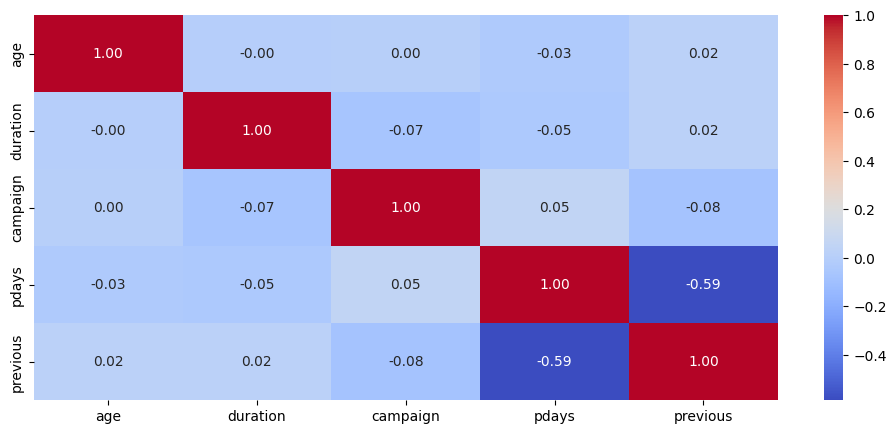

In [126]:
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix,annot = True,fmt=".2f",cmap = 'coolwarm')
plt.show()

GRÁFICOS

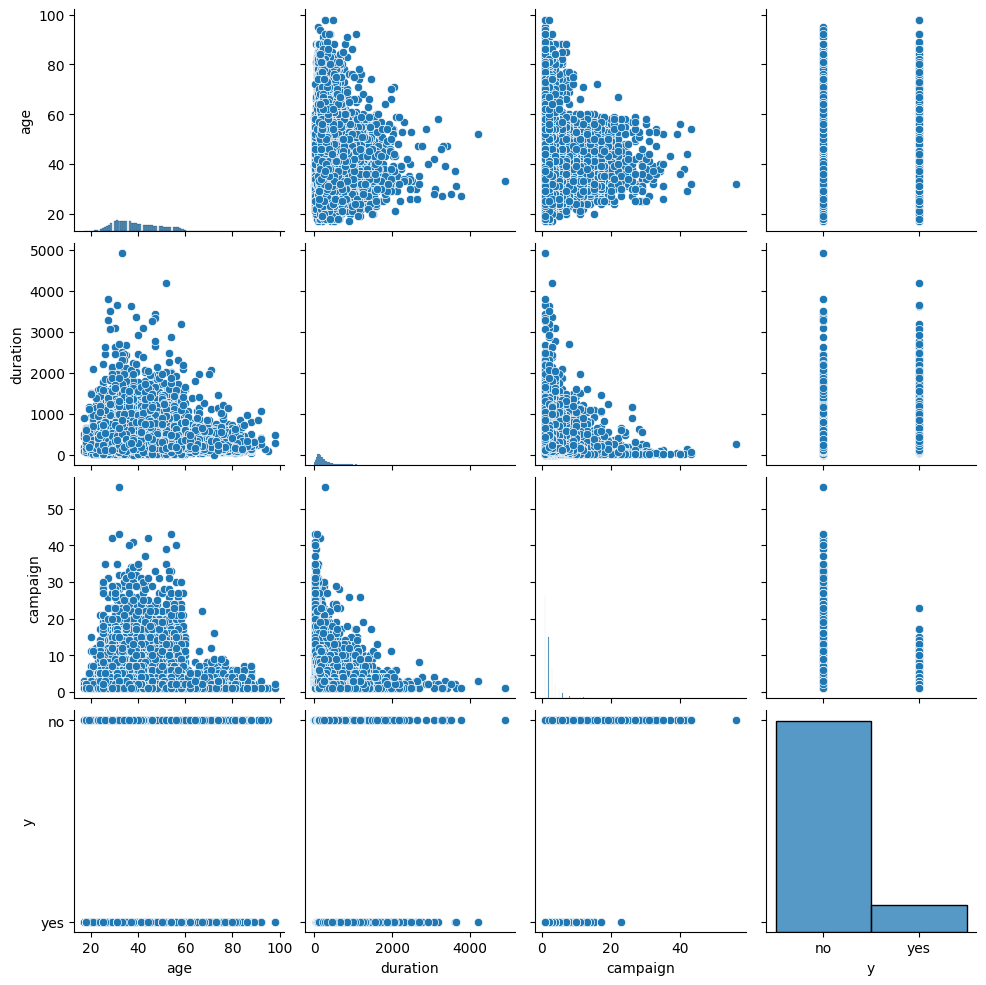

In [127]:
sns.pairplot(data=marketing,vars=['age','duration','campaign','y'])
plt.show()

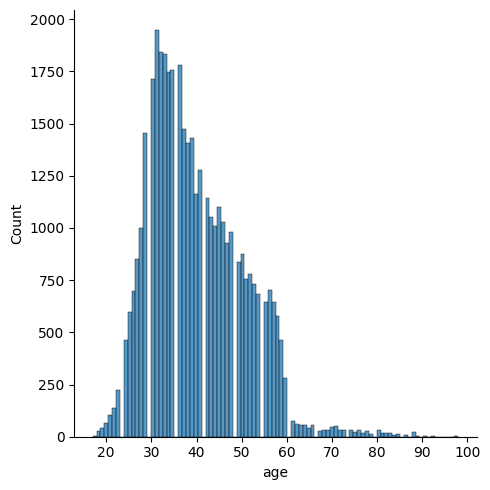

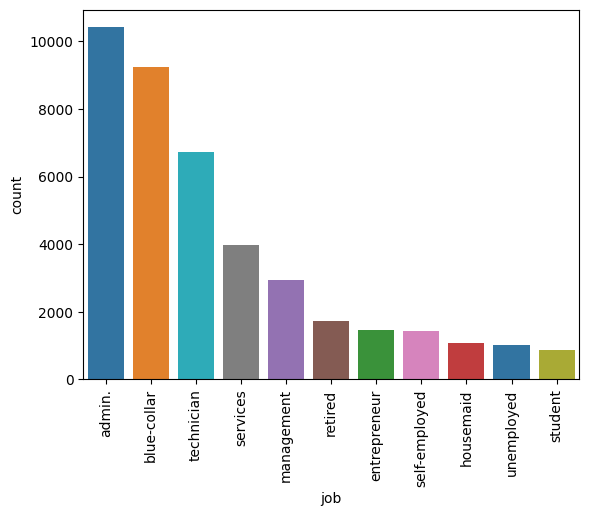

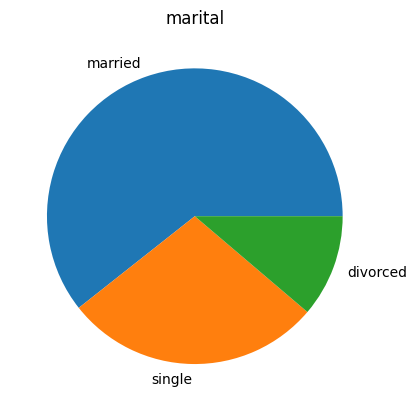

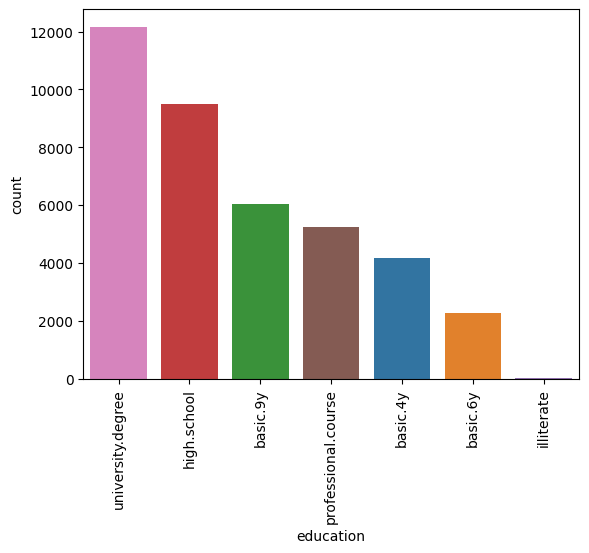

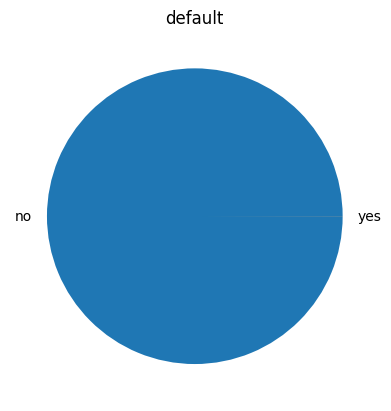

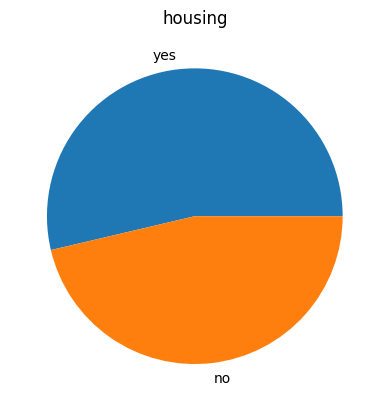

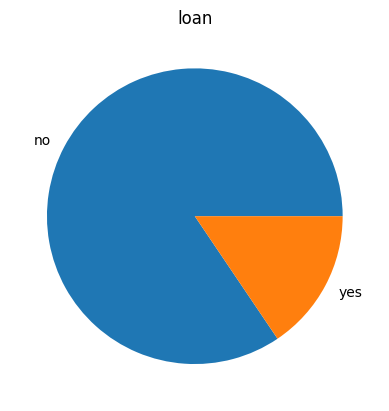

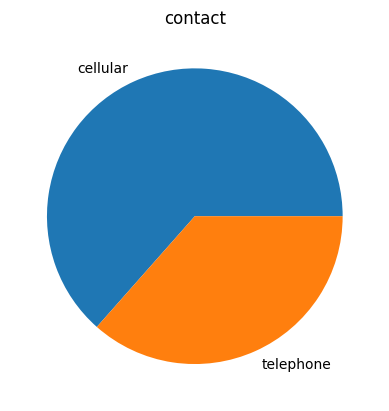

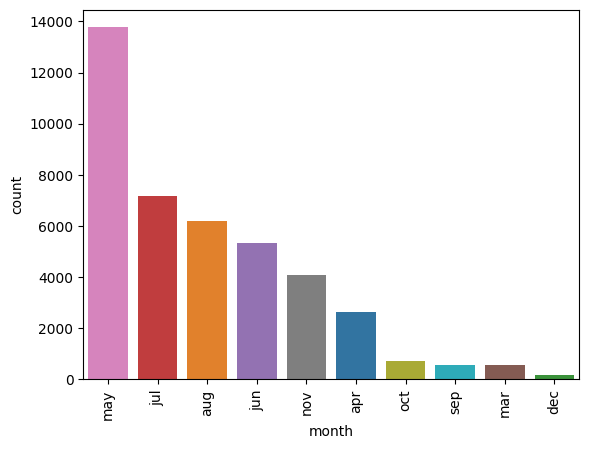

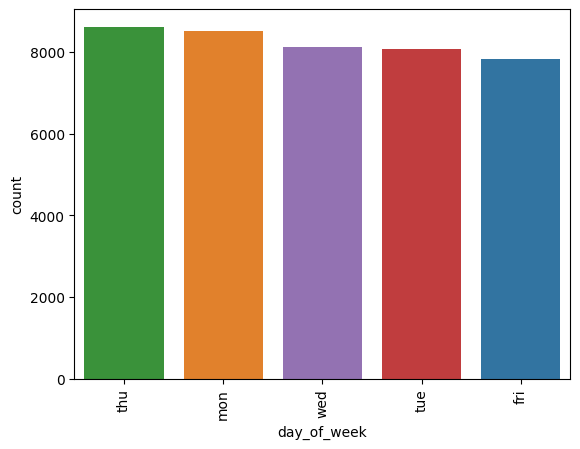

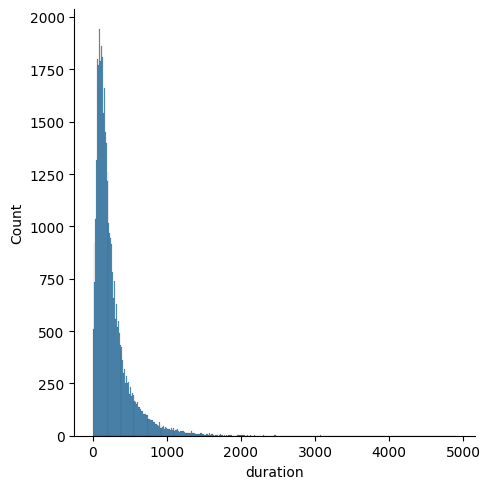

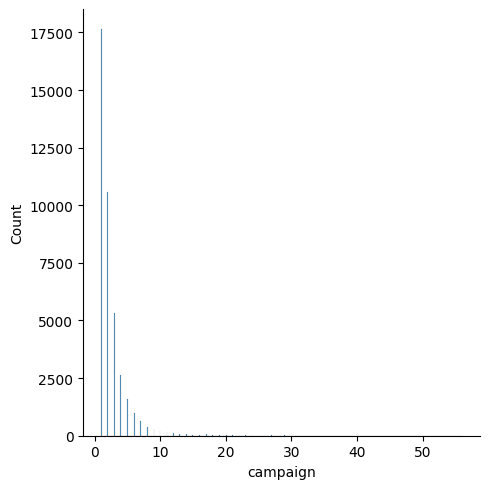

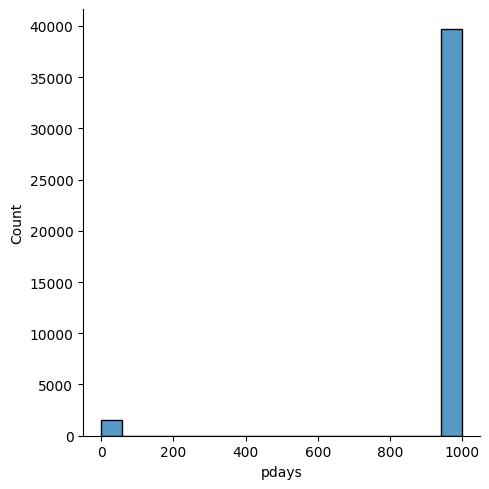

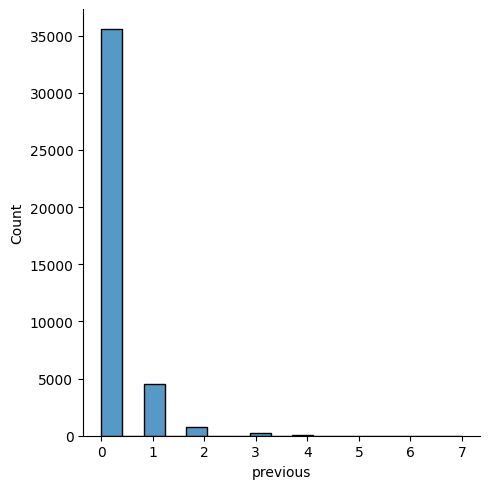

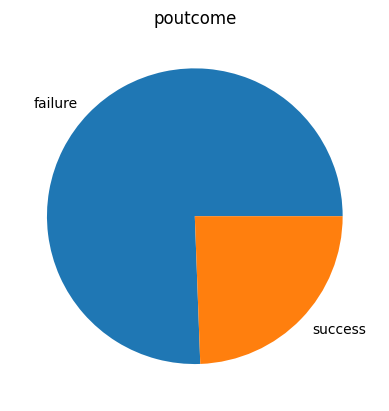

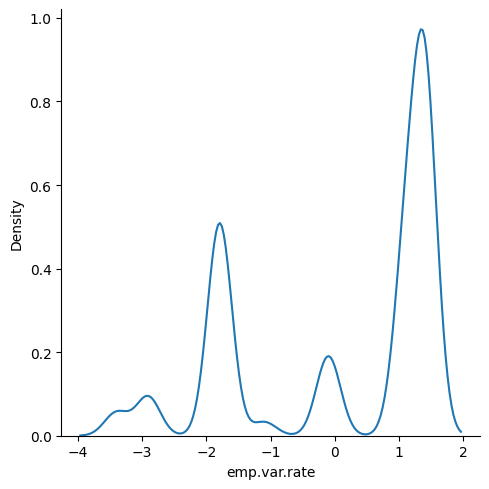

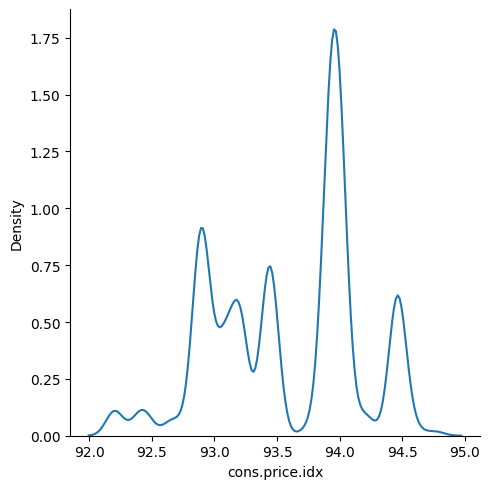

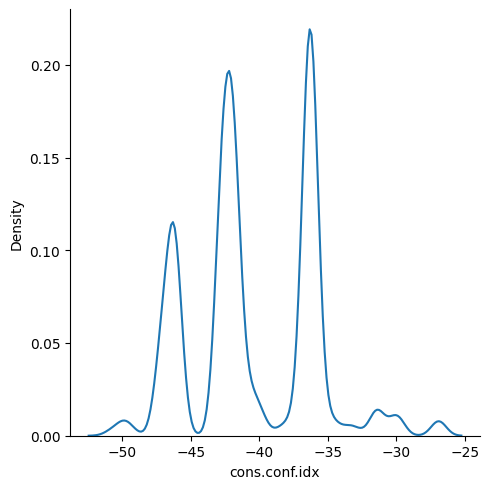

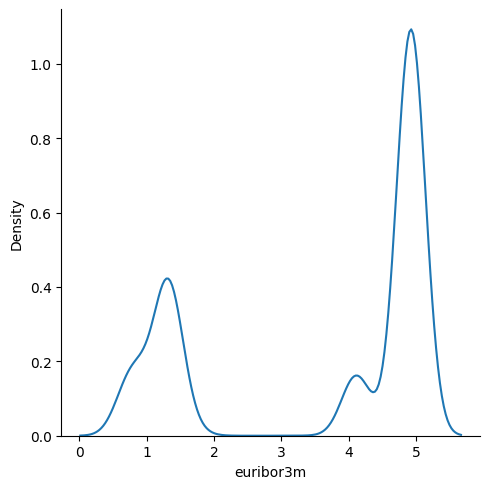

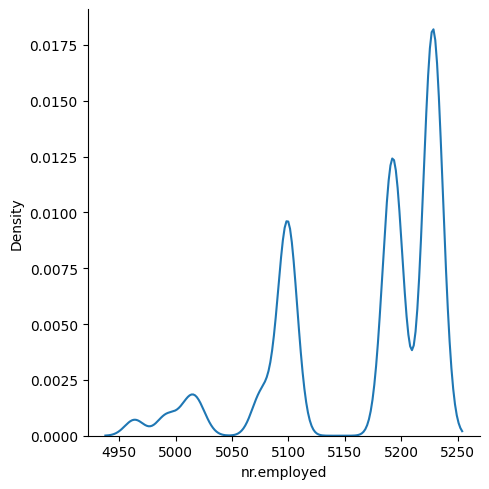

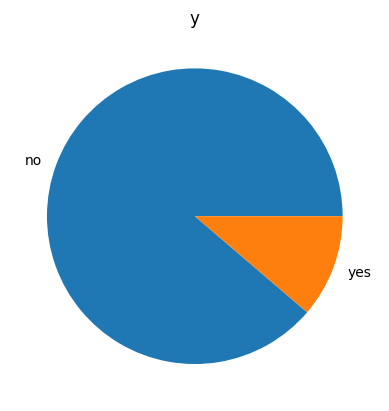

In [128]:
for col in marketing:
    #plt.figure(figsize=(10,4))
    if marketing[col].dtype=='category':
        if marketing[col].nunique()>4:
            sns.countplot(data=marketing,x=col,hue=col,order=marketing[col].value_counts().index,
                          palette='tab10',dodge=False)
            plt.legend().remove()
            plt.xticks(rotation=90)
            plt.show()
        else:
            plt.pie(marketing[col].value_counts(), labels=marketing[col].value_counts().index)
            plt.title(col)
            plt.show()
    elif marketing[col].dtype=='int64':
        sns.displot(data=marketing,x=col,kind='hist')
        plt.show()
    elif marketing[col].dtype=='float':
        sns.displot(data=marketing,x=col,kind='kde')
        plt.show()        

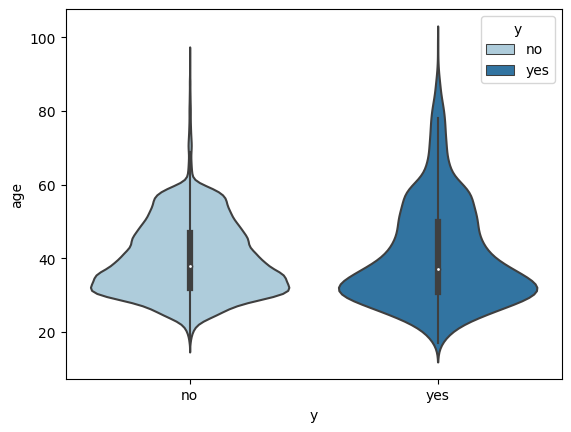

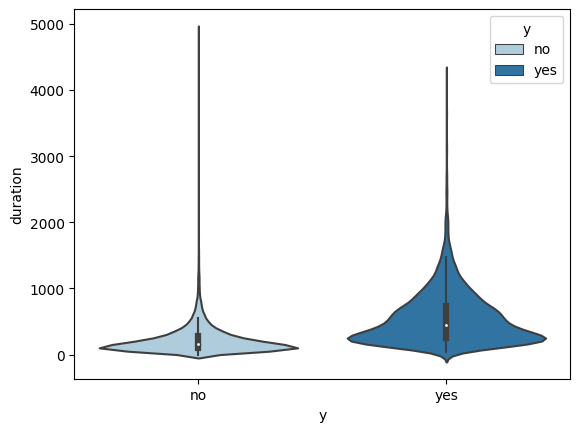

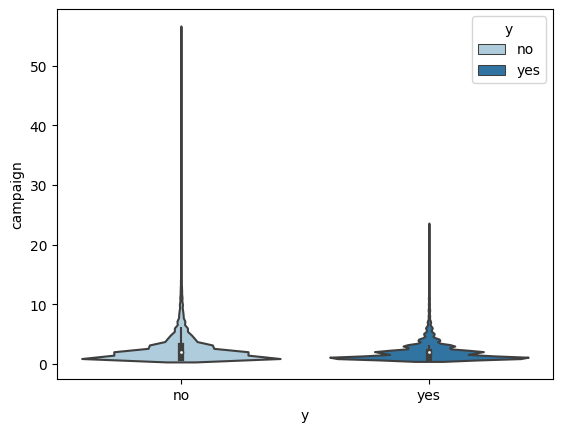

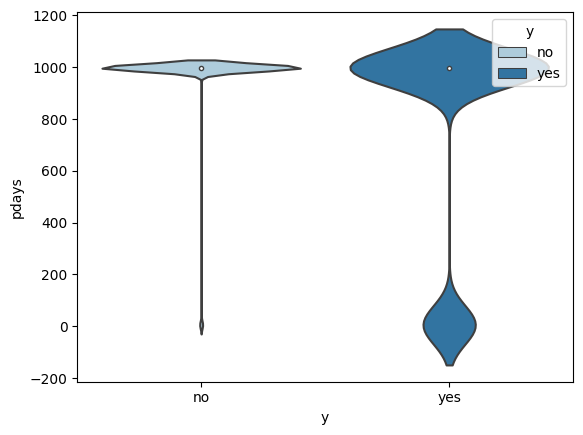

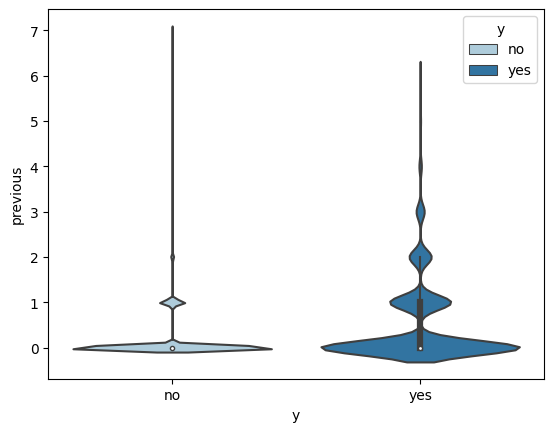

In [129]:
cols_int=['age','duration','campaign','pdays','previous']

for cols in cols_int:
    sns.violinplot(data=marketing,y=cols,x='y',hue='y',palette='Paired',dodge=False)
    plt.show()

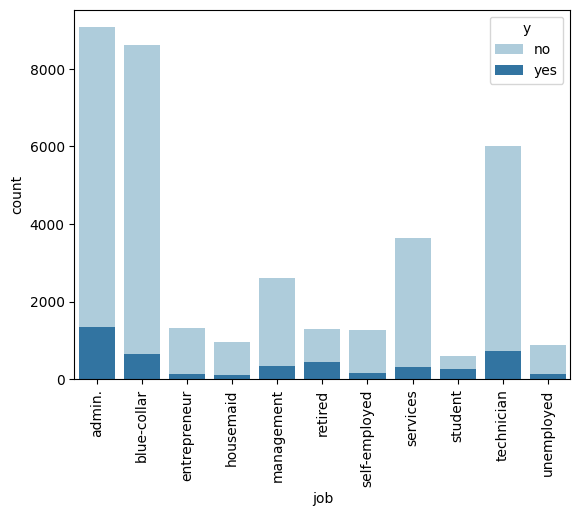

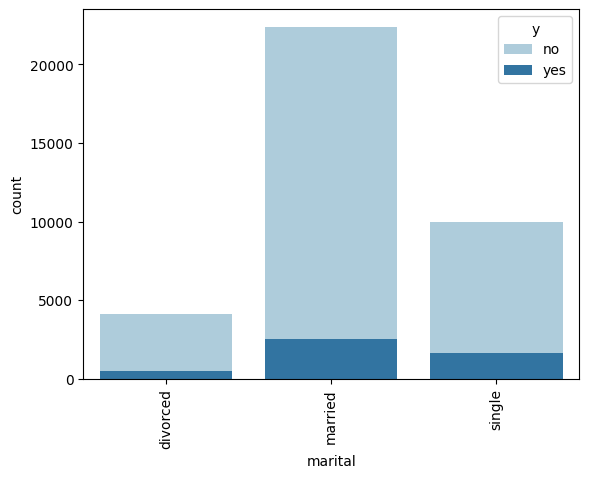

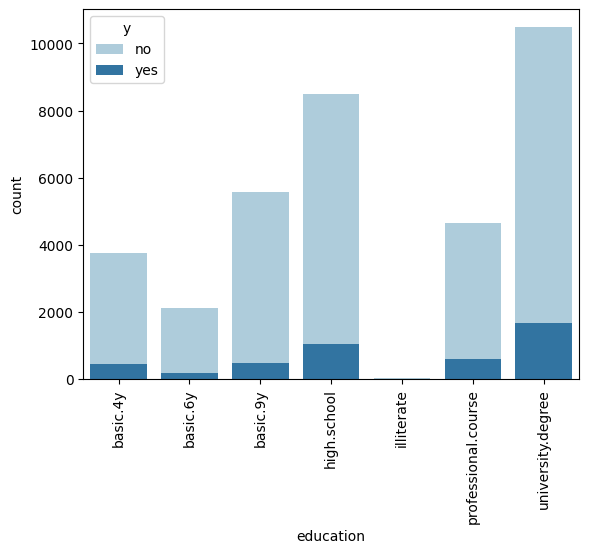

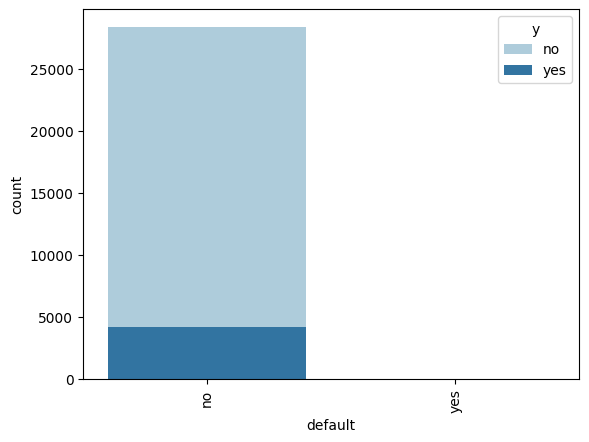

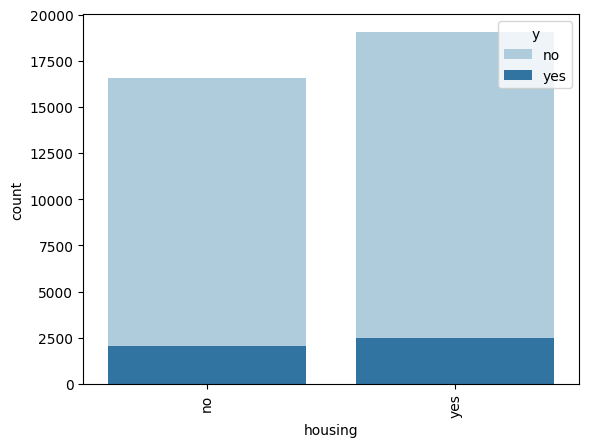

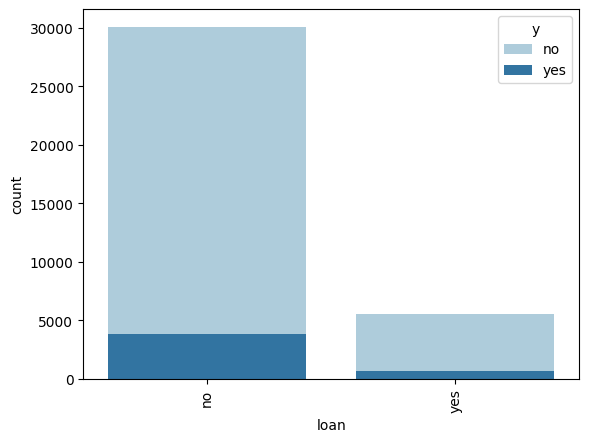

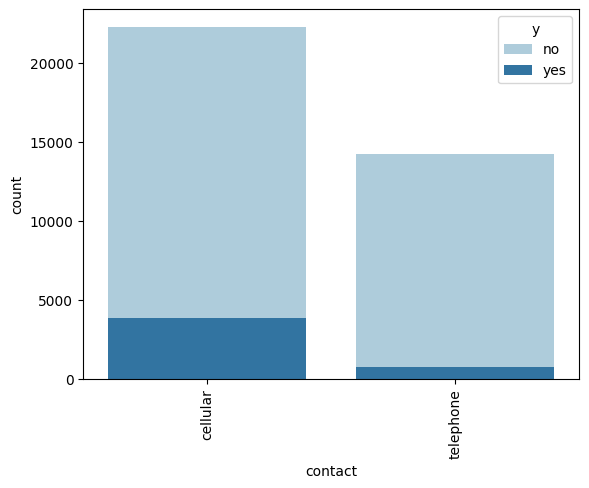

In [130]:
cols_cat=['job','marital','education','default','housing','loan','contact']

for cols in cols_cat:
    sns.countplot(data=marketing,x=cols,hue='y',palette='Paired',dodge=False)
    plt.xticks(rotation=90)
    plt.show()